# **Breast Cancer Classification using Principal Component Analysis (PCA) and Support Vector Machines (SVM)**

In this Jupyter Notebook, we use of Principal Component Analysis (PCA) for dimensionality reduction and Support Vector Machines (SVM) for classification on a breast cancer dataset. We will apply PCA to extract the most important features and visualize the cumulative variance, utilizing SVM to classify the dataset. Finally, we will visualize the decision boundaries of the SVM in a reduced two-dimensional PCA space.

***

## **1. Importing Libraries**

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import plotly.express as px
import plotly.graph_objects as go

***

## **2. Loading the Dataset**

In [2]:
# Load the dataset
data = load_breast_cancer()
dfCancer = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Display a sample of the data
dfCancer.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
443,10.57,18.32,66.82,340.9,0.08142,0.04462,0.01993,0.01111,0.2372,0.05768,...,10.94,23.31,69.35,366.3,0.09794,0.06542,0.03986,0.02222,0.2699,0.06736
281,11.74,14.02,74.24,427.3,0.07813,0.04340,0.02245,0.02763,0.2101,0.06113,...,13.31,18.26,84.70,533.7,0.10360,0.08500,0.06735,0.08290,0.3101,0.06688
383,12.39,17.48,80.64,462.9,0.10420,0.12970,0.05892,0.02880,0.1779,0.06588,...,14.18,23.13,95.23,600.5,0.14270,0.35930,0.32060,0.09804,0.2819,0.11180
182,15.70,20.31,101.20,766.6,0.09597,0.08799,0.06593,0.05189,0.1618,0.05549,...,20.11,32.82,129.30,1269.0,0.14140,0.35470,0.29020,0.15410,0.3437,0.08631
67,11.31,19.04,71.80,394.1,0.08139,0.04701,0.03709,0.02230,0.1516,0.05667,...,12.33,23.84,78.00,466.7,0.12900,0.09148,0.14440,0.06961,0.2400,0.06641


***

## **3. Data Preprocessing**

### *3.1 ~ Normalizing the Data*

In [3]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dfCancer)

***

## **4. Applying Principal Component Analysis (PCA)**

### *4.1 ~ PCA for 90% Variance Explained*

In [4]:
# Perform PCA to explain 90% of the variance
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_scaled)

# Calculate the cumulative explained variance
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

### *4.2 ~ Visualizing Cumulative Explained Variance*

In [5]:
# Line plot for cumulative variance
fig = px.line(x=range(1, len(cumulative_var)+1), y=cumulative_var,
              labels={'x': 'Number of Components', 'y': 'Cumulative Explained Variance'},
              title='Cumulative Variance Explained by PCA Components')
fig.show()

### *4.3 ~ Feature Contributions to Principal Components*

In [6]:
# Get contributions of each feature to PC1
contributions_pc1 = pca.components_[0]

# Convert to DataFrame for visualization
df_contributions = pd.DataFrame({'feature': data.feature_names, 'contribution': contributions_pc1})
df_contributions

,feature,contribution
0,mean radius,0.218902
1,mean texture,0.103725
2,mean perimeter,0.227537
3,mean area,0.220995
4,mean smoothness,0.142590
5,mean compactness,0.239285
6,mean concavity,0.258400
7,mean concave points,0.260854
8,mean symmetry,0.138167
9,mean fractal dimension,0.064363


### *4.4 Visualizing Feature Contributions*

In [7]:
# Contribution to each principal component
num_components = len(pca.components_)

# Convert to DataFrame for visualization
contributions = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, num_components+1)], index=data.feature_names)

# Calculate contributions as percentages
contributions = pca.components_**2
contributions /= contributions.sum(axis=1, keepdims=True)
contributions *= 100  # Convert to percentage
dfContributions = pd.DataFrame(contributions.T, columns=[f'PC{i}' for i in range(1, num_components+1)], index=data.feature_names)

# Create and display interactive bar plot
fig = go.Figure()

# Add traces for each Principal Component
for i, pc in enumerate(dfContributions.columns, start=1):
    fig.add_trace(go.Bar(x=dfContributions.index, y=dfContributions[pc], name=pc))

# Update layout with slider for interactivity
steps = []
for i, pc in enumerate(dfContributions.columns, start=1):
    step = dict(
        method="update",
        args=[{"visible": [el == pc for el in dfContributions.columns]},
              {"title": f"Contributions to Principal Component: {pc}"}],
        label=pc,
    )
    steps.append(step)

# Create and add slider
sliders = [dict(active=1, pad={"t": 100}, steps=steps)]
fig.update_layout(sliders=sliders)

# Set title and show plot
fig.update_layout(title="Contributions by Percent to Principal Component: Mixed", xaxis_title="Feature", yaxis_title="Contribution")
fig.show()

***

## **5. Classification using Support Vector Machines (SVM)**

### *5.1 ~ SVM with Reduced PCA Components*

In [8]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the SVM model
model = SVC()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9736842105263158
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### *5.2 ~ Visualization of SVM Decision Boundary in 2D*

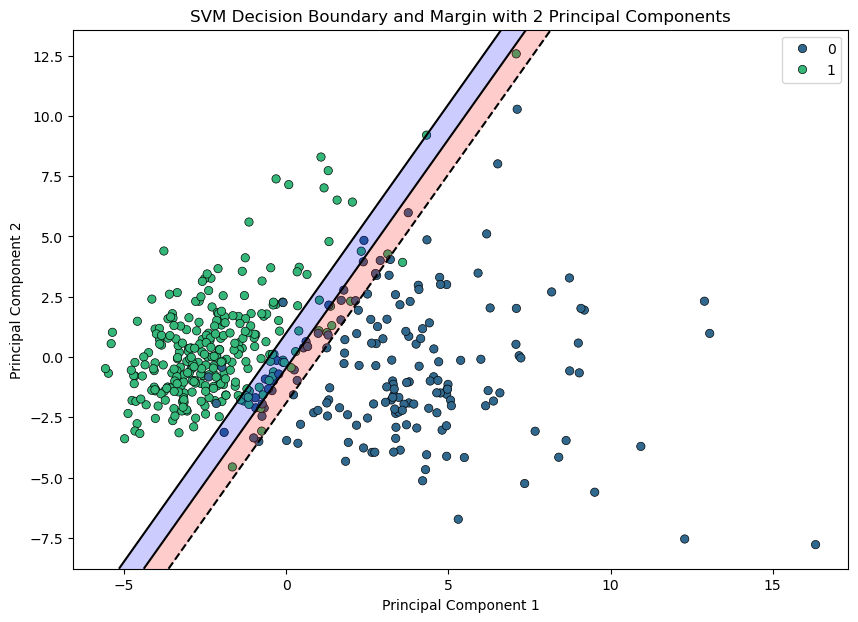

In [9]:
# Reduce to two dimensions for visualization
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

# Split the reduced dataset
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_pca_2, y, test_size=0.2, random_state=42)

# Train a linear SVM on the reduced dataset
model_2 = SVC(kernel='linear')
model_2.fit(X_train_2, y_train_2)

# Create grid for plotting decision boundaries and margins
x_min, x_max = X_pca_2[:, 0].min() - 1, X_pca_2[:, 0].max() + 1
y_min, y_max = X_pca_2[:, 1].min() - 1, X_pca_2[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict decision function on the grid
Z = model_2.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries using Seaborn and Matplotlib
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_train_2[:, 0], y=X_train_2[:, 1], hue=y_train_2, palette="viridis", edgecolor="k")
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.2, colors=['red', 'blue', 'red'])
plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors='black')

plt.title('SVM Decision Boundary and Margin with 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

***

## **6. Additional Analysis**

### *6.1 ~ Cumulative Variance of the First Four Components*

In [10]:
# Calculate and print cumulative explained variance of the first four components
cumulative_variance_first_four = np.sum(pca.explained_variance_ratio_[:4])
print("Cumulative explained variance of the first four principal components:", cumulative_variance_first_four)

Cumulative explained variance of the first four principal components: 0.7923850582446096
